# Import library

In [2]:
#@import Plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#@ Import Audio
from IPython.display import Audio
from scipy.io import wavfile
from io import BytesIO 

# Membuat Gelombang

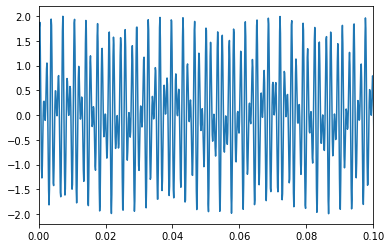

In [4]:
#signal dengan frekuensi 586 hz - 863 hz
fs = 8000
t = np.arange(0,5,step= 1./fs)
x = np.sin(2*np.pi*586*t) 
y = np.sin(2*np.pi*863*t)
z = x+y

plt.plot(t,z)
plt.xlim(0,.1)
plt.show()

##  convert menjadi suara

In [5]:
Audio(z, rate = fs)

# transformasi Fourier

In [6]:
 Z = np.fft.fft(z)
 Z

array([-2.96352675e-11+0.00000000e+00j, -2.29541795e-11-3.76899900e-11j,
       -2.40249772e-11-2.37975473e-11j, ...,
       -5.85173910e-12+2.39372485e-11j, -2.39932651e-11+2.36993918e-11j,
       -2.29523331e-11+3.76976113e-11j])

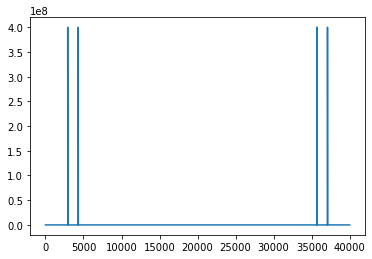

In [7]:
X_pow = np.abs(Z) ** 2
plt.plot(X_pow)

(40000, 20000)

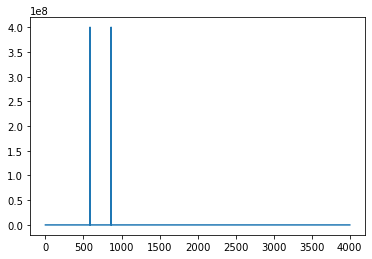

In [8]:
N = len(X_pow)
f_pos = np.arange(0, fs /2 , step= fs/N)
plt.plot(f_pos, X_pow[:(N//2)])

N, len(f_pos)

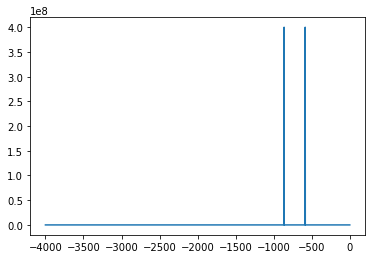

In [9]:
f_neg = np.arange(-fs / 2, 0, step=fs/N)
plt.plot(f_neg, X_pow[(N//2):])

# HIGH PASS FILTER

(-0.1, 1.1)

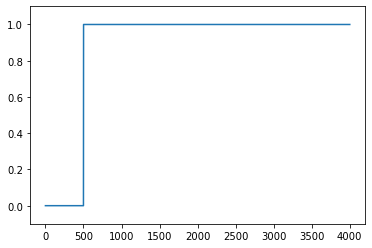

In [32]:
f_pos = np.arange(0, fs/2, step = fs/N)
H_pos = 1. * (f_pos >= 500)
plt.plot(f_pos,H_pos)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

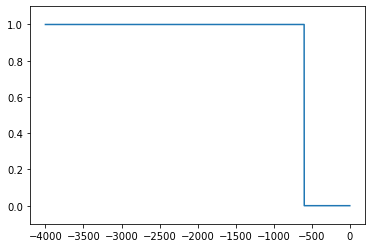

In [33]:
f_neg = np.arange( -fs/2, 0,  step = fs/N)
H_neg = 1. * (f_neg <= -600)
plt.plot(f_neg,H_neg)
plt.ylim(-.1, 1.1)

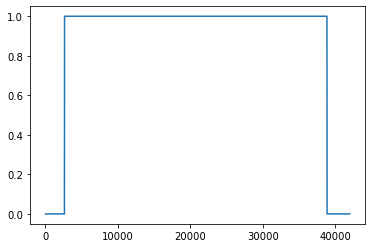

In [34]:
H = np.concatenate([H_pos, H_neg])
plt.plot(H)

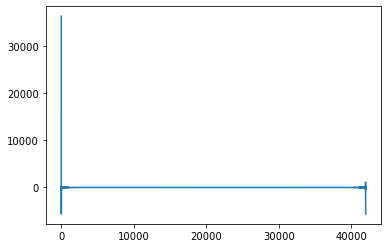

In [35]:
H = np.real(np.fft.fft(H))
plt.plot(H)

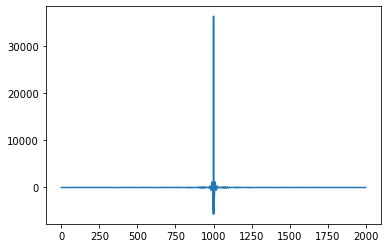

In [36]:
H_trunc = np.concatenate([H[-1000:], H[:1000]])
plt.plot(H_trunc)

In [37]:


y = np.convolve(z,H_trunc)

y = y[:-1]

(0.3, 0.4)

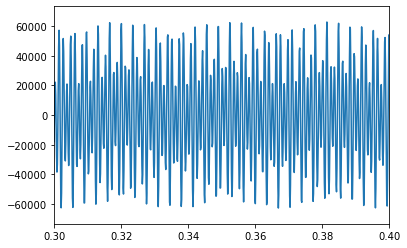

In [38]:
N = len(y)
t = np.arange(0, N / fs, step = 1 /fs)
plt.plot(t, y)
plt.xlim(.3, .4)

In [39]:
f_pos = np.arange(0, fs/2, step = fs/N)
Y = np.fft.fft(y)
Y_pow = np.abs(Y) **2

(0.0, 600.0)

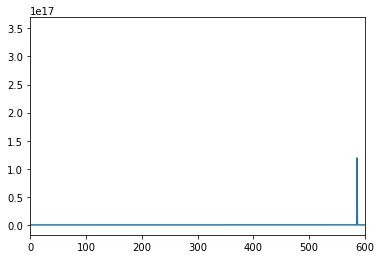

In [42]:
plt.plot(f_pos, Y_pow[:(N//2)])
plt.xlim(0, 600)

In [41]:
Audio(y, rate = fs)